<a href="https://colab.research.google.com/github/Sanjay71013/Data_Science_Practice/blob/main/Alzheimer's_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Alzheimer's Disease Prediction</center>

Alzheimer's disease is a progressive neurologic disorder that causes the brain to shrink (atrophy) and brain cells to die. Alzheimer's disease is the most common cause of dementia — a continuous decline in thinking, behavioral and social skills that affects a person's ability to function independently.

In this notebook, We are going to predict which class the person belongs to from the below 4 classes. We are going to use MRI scanned images as input for our CNN and predict the output.

The data consists of MRI images. The data has four classes of images both in training as well as a testing set:

1. Mild Demented

2. Moderate Demented

3. Non Demented

4. Very Mild Demented

# Importing Libraries

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 133 kB 4.3 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Argumentation

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale = 1/255,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    vertical_flip = False)
training_set = train_datagen.flow_from_directory('./Alzheimer_s Dataset/train',
                                                 target_size = (64, 64),
                                                 class_mode = 'categorical')

Found 5121 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_set = test_datagen.flow_from_directory('./Alzheimer_s Dataset/test',
                                            target_size = (64, 64),
                                            class_mode = 'categorical')

Found 1279 images belonging to 4 classes.


In [ ]:
training_set.class_indices

{'MildDemented': 0,
 'ModerateDemented': 1,
 'NonDemented': 2,
 'VeryMildDemented': 3}

# Building the CNN

## Importing the Libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

## Initialising the CNN

In [ ]:
cnn = Sequential()

## Step 1 - Convolution

In [ ]:
cnn.add(Convolution2D(filters=32, kernel_size=3, activation='relu', input_shape=(64,64,3)))

## Step 2 - Pooling

In [ ]:
cnn.add(MaxPooling2D(pool_size=(2,2)))

## Adding a second convolutional layer

In [ ]:
cnn.add(Convolution2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))

## Step 3 - Flattening

In [ ]:
cnn.add(Flatten())

## Step 4 - Adding Hidden Layers

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
## Hidden Layer-1
cnn.add(Dense(units=256, activation='relu'))
## Adding a Dropout Layer
cnn.add(Dropout(0.3))
## Hidden Layer-2
cnn.add(Dense(units=128, activation='relu'))

## Step 5 - Output Layer

In [ ]:
cnn.add(Dense(units=4, activation='softmax'))

# Training the CNN

## Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Early Stopping

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

## Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit_generator(training_set, steps_per_epoch= len(training_set), validation_data = test_set, validation_steps=len(test_set), epochs = 200, callbacks = early_stopping)

C:\Users\sanja\AppData\Local\Temp/ipykernel_7240/59579697.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(training_set, steps_per_epoch= len(training_set), validation_data = test_set, validation_steps=len(test_set), epochs = 200, callbacks = early_stopping)


Epoch 1/200
161/161 [==============================] - 83s 507ms/step - loss: 1.0356 - accuracy: 0.4870 - val_loss: 1.0387 - val_accuracy: 0.5082
Epoch 2/200
161/161 [==============================] - 36s 224ms/step - loss: 0.9106 - accuracy: 0.5554 - val_loss: 1.0329 - val_accuracy: 0.5285
Epoch 3/200
161/161 [==============================] - 36s 226ms/step - loss: 0.8762 - accuracy: 0.5708 - val_loss: 1.0677 - val_accuracy: 0.5403
Epoch 4/200
161/161 [==============================] - 39s 243ms/step - loss: 0.8436 - accuracy: 0.5839 - val_loss: 0.9041 - val_accuracy: 0.5700
Epoch 5/200
161/161 [==============================] - 57s 354ms/step - loss: 0.8132 - accuracy: 0.6003 - val_loss: 1.0515 - val_accuracy: 0.5661
Epoch 6/200
161/161 [==============================] - 61s 377ms/step - loss: 0.7780 - accuracy: 0.6292 - val_loss: 1.0303 - val_accuracy: 0.5676
Epoch 7/200
161/161 [==============================] - 34s 210ms/step - loss: 0.7676 - accuracy: 0.6302 - val_loss: 1.1437 -

# Saving the Model

In [ ]:
cnn.save('alzheimer.h5')

# Making Single prediction

## Prediction - 1

In [ ]:
from keras_preprocessing.image.utils import load_img
import numpy as np
from keras.preprocessing import image

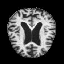

In [ ]:
img = image.load_img('./Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg', target_size=(64,64))
img

In [ ]:
x = image.img_to_array(img)
print(x)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [ ]:
x = np.expand_dims(x,axis=0)
print(x)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [ ]:
pred = np.argmax(cnn.predict(x),axis=1)
pred

array([3], dtype=int64)

In [ ]:
index = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']

In [ ]:
index[pred[0]]

'VeryMildDemented'

## Prediction -2

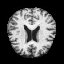

In [ ]:
img = image.load_img('./Alzheimer_s Dataset/test/NonDemented/26 (62).jpg', target_size=(64,64))
img

In [ ]:
x = image.img_to_array(img)
print(x)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [ ]:
x = np.expand_dims(x,axis=0)
print(x)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [ ]:
pred = np.argmax(cnn.predict(x),axis=1)
pred

array([2], dtype=int64)

In [ ]:
index = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']

In [ ]:
index[pred[0]]

'NonDemented'

## Prediction - 3

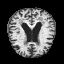

In [ ]:
img = image.load_img('./Alzheimer_s Dataset/test/VeryMildDemented/26 (59).jpg', target_size=(64,64))
img

In [ ]:
x = image.img_to_array(img)
print(x)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [ ]:
x = np.expand_dims(x,axis=0)
print(x)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [ ]:
pred = np.argmax(cnn.predict(x),axis=1)
pred

array([3], dtype=int64)

In [ ]:
index = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']

In [ ]:
index[pred[0]]

'VeryMildDemented'

## Prediction - 4

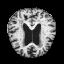

In [ ]:
img = image.load_img('./Alzheimer_s Dataset/test/MildDemented/27 (20).jpg', target_size=(64,64))
img

In [ ]:
x = image.img_to_array(img)
print(x)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [ ]:
x = np.expand_dims(x,axis=0)
print(x)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]]


In [ ]:
pred = np.argmax(cnn.predict(x),axis=1)
pred

array([3], dtype=int64)

In [ ]:
index = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented'] 

In [ ]:
index[pred[0]]

'VeryMildDemented'